In [29]:
import pandas as pd
import numpy as np

variaveis = ['QE_I02', 'QE_I04', 'QE_I05', 'QE_I07', 'QE_I08', 'CO_CURSO']
dados = pd.read_csv('./dados/microdados.csv', usecols=variaveis, sep=';')
dados = dados[dados['QE_I02'].notnull() & dados['QE_I04'].notnull() & dados['QE_I05'].notnull() & dados['QE_I07'].notnull() & dados['QE_I08'].notnull() & dados['CO_CURSO'].notnull()]

# QE_I08 renda : A-G
# QE_I07 quantidade de pessoas na casa : A-H
# QE_I05 escolaridade da mae : A-F
# QE_I04 escolaridade do pai : A-F
# QE_I02 raca/cor : A-F

In [30]:
conceitos = pd.read_csv('./dados/resultados_conceito_enade_2017.csv',
                       usecols=['Código do Curso', 'Conceito Enade (Faixa)', 'Área de Avaliação', 'Sigla da IES'])
conceito_maximo = conceitos[conceitos['Conceito Enade (Faixa)'] == '5']['Código do Curso'].tolist()
conceito_minimo = conceitos[conceitos['Conceito Enade (Faixa)'] == '3']['Código do Curso'].tolist()
print(len(conceito_maximo), len(conceito_minimo))

600 3996


In [31]:
vv = ['QE_I02', 'QE_I04', 'QE_I05', 'QE_I07', 'QE_I08']
substituir = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8}
for v in vv:
    dados[v] = dados[v].replace(substituir)
    


In [32]:
social = dados['QE_I02'] + dados['QE_I04'] + dados['QE_I05'] + dados['QE_I07'] + dados['QE_I08']
dados['social'] = social

In [33]:
import collections
counter = collections.Counter

porcentagens_min_conceito = []
for curso in conceito_minimo:
    dlist = dados[dados['CO_CURSO']==curso]['social'].values.tolist()
    total_alunos = len(dlist)
    temp = counter(dlist)
    values = temp.values()
    if values:
        porcentagens_min_conceito.append((curso, max(values)/total_alunos, total_alunos))

porcentagens_max_conceito = []
for curso in conceito_maximo:
    dlist = dados[dados['CO_CURSO']==curso]['social'].values.tolist()
    total_alunos = len(dlist)
    temp = counter(dlist)
    values = temp.values()
    if values:
        porcentagens_max_conceito.append((curso, max(values)/total_alunos, total_alunos))



In [34]:
r1 = [ x for x in porcentagens_min_conceito if x[1] > 0.5 ]
r1

[(109796, 0.6666666666666666, 3),
 (112526, 0.6, 5),
 (99100, 1.0, 2),
 (42056, 0.625, 8),
 (20874, 1.0, 2),
 (123775, 0.6, 5),
 (104278, 0.6666666666666666, 3),
 (98043, 0.6666666666666666, 3),
 (93789, 0.5714285714285714, 7),
 (41077, 0.6666666666666666, 3),
 (15721, 0.5454545454545454, 11),
 (35334, 0.6666666666666666, 3),
 (1716, 0.6666666666666666, 3),
 (11229, 1.0, 1),
 (105872, 0.5384615384615384, 13),
 (98744, 0.6666666666666666, 3),
 (121702, 0.6666666666666666, 3),
 (1187885, 0.5714285714285714, 7),
 (1107969, 0.625, 8),
 (27032, 0.5714285714285714, 7),
 (101405, 0.6, 5)]

In [35]:
r2 = [ x for x in porcentagens_max_conceito if x[1] > 0.5 ]

In [55]:
gr = []
for c in r1:
    temp = conceitos[conceitos['Código do Curso'] == c[0]]
    area = temp['Área de Avaliação'].values[0]
    sigla = temp['Sigla da IES'].values[0]
    if type(sigla) == str:
        gr.append([area, sigla, c[2], c[1]])

gr1_df = pd.DataFrame(gr, columns = ['Área', 'Sigla', 'Total', 'Social Igual'])
gr1_df 

,Área,Sigla,Total,Social Igual
0,TECNOLOGIA EM ANÁLISE E DESENVOLVIMENTO DE SIS...,IDEAU,5,0.600000
1,MATEMÁTICA (BACHARELADO),UFES,2,1.000000
2,LETRAS-PORTUGUÊS (LICENCIATURA),UNIVILLE,8,0.625000
3,LETRAS-PORTUGUÊS E ESPANHOL (LICENCIATURA),UNIC/UNIME,2,1.000000
4,FÍSICA (LICENCIATURA),IFRN,5,0.600000
5,FÍSICA (LICENCIATURA),UNIPAMPA,3,0.666667
6,QUÍMICA (LICENCIATURA),ISECAMP,3,0.666667
7,PEDAGOGIA (LICENCIATURA),FAFIBE,7,0.571429
8,PEDAGOGIA (LICENCIATURA),UFPR,3,0.666667
9,HISTÓRIA (LICENCIATURA),UNESPAR,11,0.545455


In [56]:
gr2 = []
for c in r2:
    temp = conceitos[conceitos['Código do Curso'] == c[0]]
    area = temp['Área de Avaliação'].values[0]
    sigla = temp['Sigla da IES'].values[0]
    if type(sigla) == str:
        gr2.append([area, sigla, c[2], c[1]])

gr2_df = pd.DataFrame(gr2, columns = ['Área', 'Sigla', 'Total', 'Social Igual'])
gr2_df

,Área,Sigla,Total,Social Igual
0,TECNOLOGIA EM ANÁLISE E DESENVOLVIMENTO DE SIS...,IFRN,3,0.666667
1,LETRAS-PORTUGUÊS (BACHARELADO),UFJF,5,0.800000
2,QUÍMICA (LICENCIATURA),IFSP,4,0.750000
3,CIÊNCIAS BIOLÓGICAS (LICENCIATURA),UNIP,3,0.666667
4,MÚSICA (LICENCIATURA),UFU,3,0.666667
5,ENGENHARIA DE ALIMENTOS,UFPE,5,0.800000


In [38]:
print(len(r1)/len(porcentagens_min_conceito))
print(len(r2)/len(porcentagens_max_conceito))

0.005256570713391739
0.011666666666666667


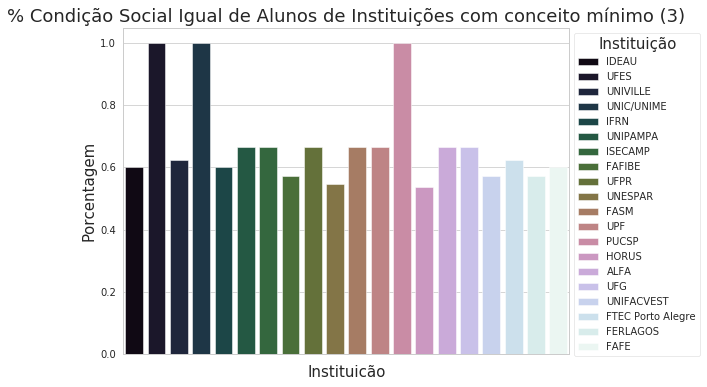

In [65]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

fig, ax = plt.subplots(figsize=(8,6))

ax = sns.barplot('Sigla', 'Social Igual', data=gr1_df, hue='Sigla', 
                 dodge=False, palette='cubehelix')

ax.set_title('% Condição Social Igual de Alunos de Instituições com conceito mínimo (3)', fontsize=18)

ax.set_xlabel('Instituicão', fontsize=15)

ax.set(xticklabels=[])

ax.set_ylabel('Porcentagem', fontsize=15)

plt.legend(title='Instituição', bbox_to_anchor=(1, 1))
plt.setp(ax.get_legend().get_title(), fontsize='15') 

plt.show()

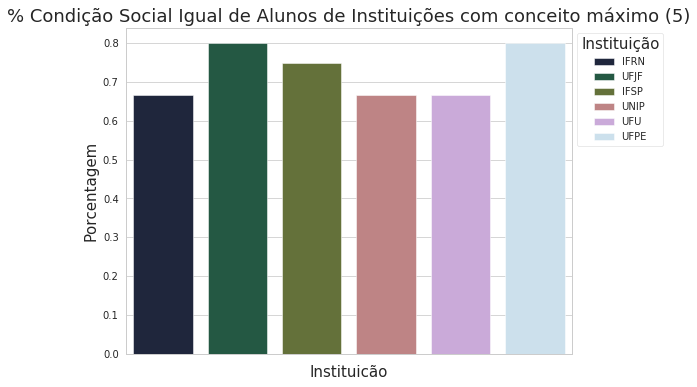

In [67]:
fig, ax = plt.subplots(figsize=(8,6))

ax = sns.barplot('Sigla', 'Social Igual', data=gr2_df, hue='Sigla', 
                 dodge=False, palette='cubehelix')

ax.set_title('% Condição Social Igual de Alunos de Instituições com conceito máximo (5)', fontsize=18)

ax.set_xlabel('Instituicão', fontsize=15)

ax.set(xticklabels=[])

ax.set_ylabel('Porcentagem', fontsize=15)

plt.legend(title='Instituição', bbox_to_anchor=(1, 1))
plt.setp(ax.get_legend().get_title(), fontsize='15') 

plt.show()